<a href="https://colab.research.google.com/github/kennc05/household_electricity_forecasting/blob/main/4.%20Support%20Vector%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Regression

##1. Import libraries

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount("/content/drive")

full_path = "/content/drive/MyDrive/Kenn @Newcastle Uni/20-21 - Year 3/CSC3032: Dissertation/Code/London Smart Meters/Datasets"

# import libraries needed 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR


# importing performance metrics
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# set pandas display options 
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Features to use based on correlation analysis

In [ ]:
#All features except temperatureLow as it is redundant
all_individual_features = ['day_of_week', 'day_of_month', 'month',
       'Acorn_grouped_Adversity', 'Acorn_grouped_Affluent',
       'Acorn_grouped_Comfortable', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']

all_acorn_features = ['day_of_week', 'day_of_month', 'month', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']


#Top 8 from pearson correlations

#For all individual dataset only 
pearson_0 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh']

pearson_1 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']

pearson_2 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh', 'month', 'day_of_week']

pearson_3 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'Acorn_grouped_Adversity', 
             'uvIndex', 'dewPoint', 'temperatureHigh',  'month', 'day_of_week', 'public_holiday']
             


#----
#For acorn datasets
pearson_4 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh']

pearson_5 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']
        
pearson_6 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month']


pearson_7 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month', 'public_holiday']


#For individual only
mutual_information_0 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex']

mutual_information_1 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'public_holiday']

mutual_information_2 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month']

mutual_information_3 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month', 'public_holiday']                                            


#----
#For acorn datasets
mutual_information_4 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex']

mutual_information_5 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'public_holiday']

mutual_information_6 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month']

mutual_information_7 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month', 'public_holiday']


#Calendar attributes worth considering: 'day_of_week',	'day_of_month',	'month', 'public_holiday'


#For use when iterating through each of the feature selection and household groups
individual_feature_groups_pearson = [pearson_0, pearson_1, pearson_2, pearson_3]
individual_feature_groups_mutual_information = [mutual_information_0, mutual_information_1, mutual_information_2, mutual_information_3]

#All acorn groups
acorn_groups_pearson = [pearson_4, pearson_5, pearson_6, pearson_7] 
acorn_groups_mutual_information = [mutual_information_4, mutual_information_5, mutual_information_6, mutual_information_7]


#Households to test
affluent_1 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_1.csv')
affluent_2 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_2.csv')
affluent_3 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_3.csv')

comfortable_1 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_1.csv')
comfortable_2 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_2.csv')
comfortable_3 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_3.csv')

adversity_1 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_1.csv')
adversity_2 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_2.csv')
adversity_3 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_3.csv')


#Households to test
affluent_households_test = [affluent_1, affluent_2, affluent_3] 
comfortable_households_test = [comfortable_1, comfortable_2, comfortable_3] 
adversity_households_test = [adversity_1, adversity_2, adversity_3]

##3. Helper functions

In [ ]:
#Run the model and see performance for each group
def run_model(X_train, X_test, y_train, y_test, feature_groups, household_groups):
  
  scaler = MinMaxScaler()

  household_1_predictions = []
  household_2_predictions = []
  household_3_predictions = []

  print("-- Model performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))

  for i in range(0, len(feature_groups)):

    #Scale the dataset first
    X_train_scaled = scaler.fit_transform(X_train[feature_groups[i]])
    X_test_scaled = scaler.fit_transform(X_test[feature_groups[i]])

    #then fit the dataset to the model itself
    #model = SVR(kernel = 'rbf') #linear vs rbf #Also try linear to see results
    #model = SVR(kernel = 'linear')
    
    model = LinearSVR(verbose=0, dual=True)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))

    #Scale the dataset for each household also 
    household_1_scaled = scaler.fit_transform(household_groups[0][feature_groups[i]])
    household_2_scaled = scaler.fit_transform(household_groups[1][feature_groups[i]])
    household_3_scaled = scaler.fit_transform(household_groups[2][feature_groups[i]])

    #Then make predictions for that household
    household_1_predictions.append(model.predict(household_1_scaled))
    household_2_predictions.append(model.predict(household_2_scaled))
    household_3_predictions.append(model.predict(household_3_scaled))

  return household_1_predictions, household_2_predictions, household_3_predictions

#Visualise the results against household prediction against each feature group
def visualise_results (household_data, household_predictions):
  household_data_consumption = household_data['energy_sum'] 
  household_data['day']=  pd.to_datetime(household_data['day'],format='%Y-%m-%d')

  plt.clf()
  plt.figure(figsize = (25,5))
  plt.plot(household_data['day'], household_data_consumption, label='Actual consumption')

  for i in range(0, len(household_predictions)):
    plt.plot(household_data['day'], household_predictions[i], label='Feature group ' + str(i))

  plt.xlabel('Day')
  plt.ylabel('Electricity consumed (kWh)')
  plt.legend()
  plt.show()


#Get the performance metrics 
#MAE, MAPE, MSE, RMSE, R2
def get_performance(household_consumption, household_predictions):
  household_consumption = household_consumption['energy_sum']
  
  print("-- Household forecasting performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))

  for i in range(0, len(household_predictions)):
    mae = mean_absolute_error(household_consumption, household_predictions[i])
    mape = mean_absolute_percentage_error(household_consumption, household_predictions[i])
    mse = mean_squared_error(household_consumption, household_predictions[i])
    rmse = np.sqrt(mse)
    r2 = r2_score(household_consumption, household_predictions[i])

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))


#Save to .csv file for comparasion between models later
def save_best_results(household_predictions, best_feature_group, acorn_name, household_name):
  best_household_predictions = household_predictions[best_feature_group]
  np.savetxt(full_path + '/daily/individual_households_test/'+acorn_name+'/'+household_name+'_predictions_model3.csv', best_household_predictions, delimiter=",")

## All acorn groups combined



### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC004552  2012-01-01            6             1      1   
1  MAC004552  2012-01-02            0             2      1   
2  MAC004552  2012-01-03            1             3      1   
3  MAC004552  2012-01-04            2             4      1   
4  MAC004552  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     1.0                        0.0   
1                      0.0                     1.0                        0.0   
2                      0.0                     1.0                        0.0   
3                      0.0                     1.0                        0.0   
4                      0.0                     1.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.488749286126235       127524473332315.11      85.679127068529         9.256302019085645       0.0034509021552736607  
1               5.48562537313994        126420291823510.05      85.9005131982252        9.268252974440502       0.0008759208806906615  
2               5.492676439429185       129370737646703.0       85.08158275514226       9.223967842265186       0.010401045869407377   
3               5.487449544171924       127747842895529.2       85.4550800096963        9.244191690445211       0.00605683316780492    


<Figure size 432x288 with 0 Axes>

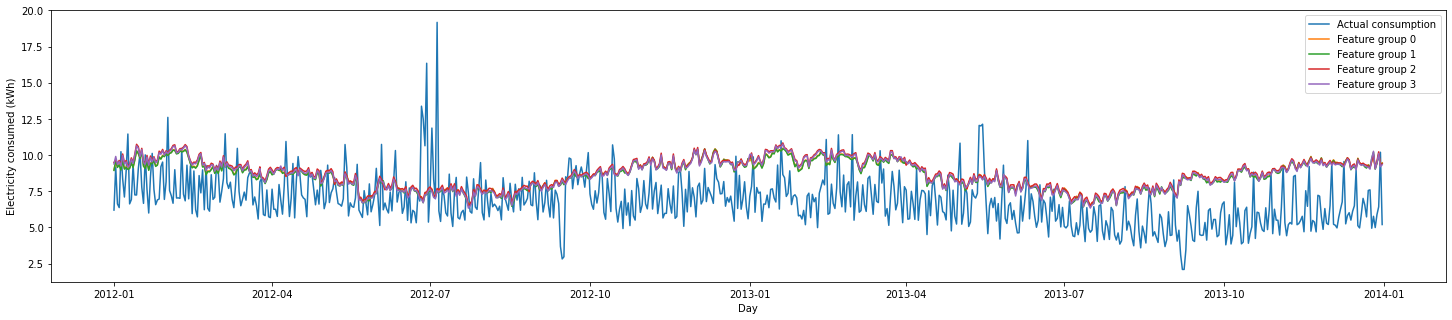

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.1441458117114505      0.36707662283072573     6.423094359562959       2.53438244145649        -1.1291573446542422    
1               2.112079752981105       0.36126058602461675     6.274413058349225       2.5048778529799063      -1.0798717718803261    
2               2.2425407771594075      0.3833628119077633      6.920733501569244       2.6307287016279814      -1.2941170937839765    
3               2.1635553983711993      0.36938472708098274     6.544374288200919       2.558197468570579       -1.1693597823522346    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

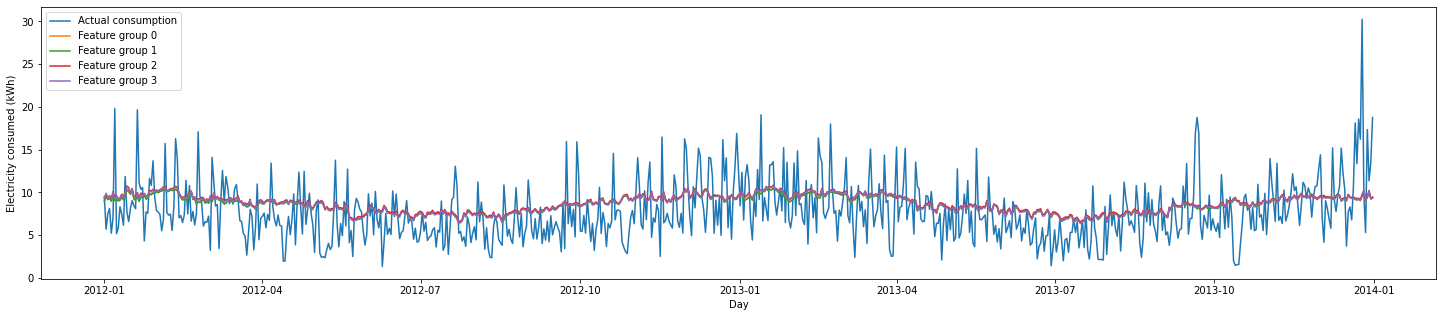

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.66650664840369        0.4880365871995047      11.066595414275744      3.3266492773173044      0.058975335354097824   
1               2.6459675105716927      0.4827554341380149      10.95752609806759       3.3102154156591665      0.0682498152520018     
2               2.68779439341384        0.49741215050387755     11.167543769424299      3.3417875111120243      0.05039140429905242    
3               2.6435214018952684      0.48543832809613496     10.924187187299578      3.3051758179103845      0.07108471940731731    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

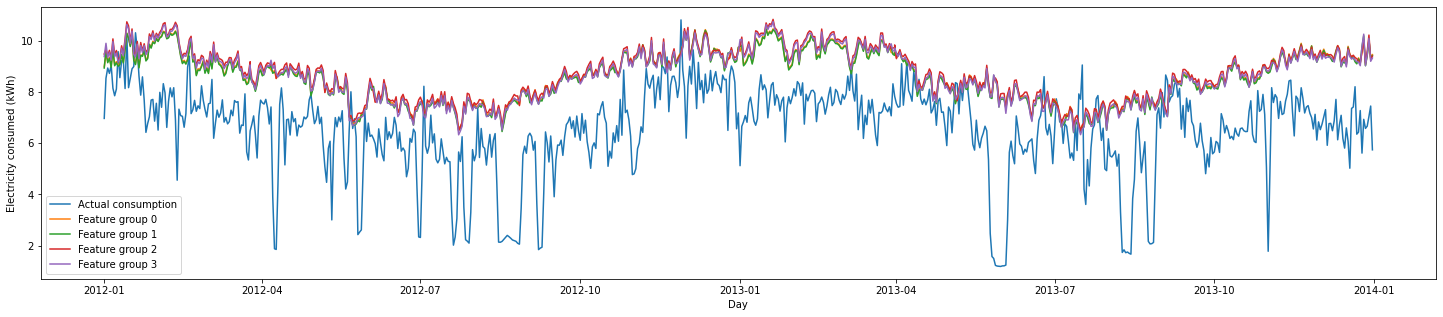

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.1064693315483503      0.4866312352542589      6.266412998158925       2.5032804473648023      -1.1741017465976875    
1               2.0659127709786222      0.4790656328788364      6.09370437289887        2.468542965576834       -1.114181322594244     
2               2.223066374403179       0.5065407639425635      6.802484022931033       2.6081572082470474      -1.3600890014434608    
3               2.1247224470579353      0.48813022708094556     6.361031614934369       2.5221085652553437      -1.2069292190372773    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Affluent households - mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.509168838409498       127782488195654.12      86.21906363834039       9.285422103401675       -0.002829195692928721  
1               5.510794961487411       128444712334564.45      86.037171973859         9.275622457488177       -0.0007135815364092135 
2               5.50637504088172        126982991236526.86      86.46186696876866       9.29848734842225        -0.005653284221497135  
3               5.509118203376109       128210327472134.56      86.15023686567204       9.281715189859687       -0.0020286593131013664 


<Figure size 432x288 with 0 Axes>

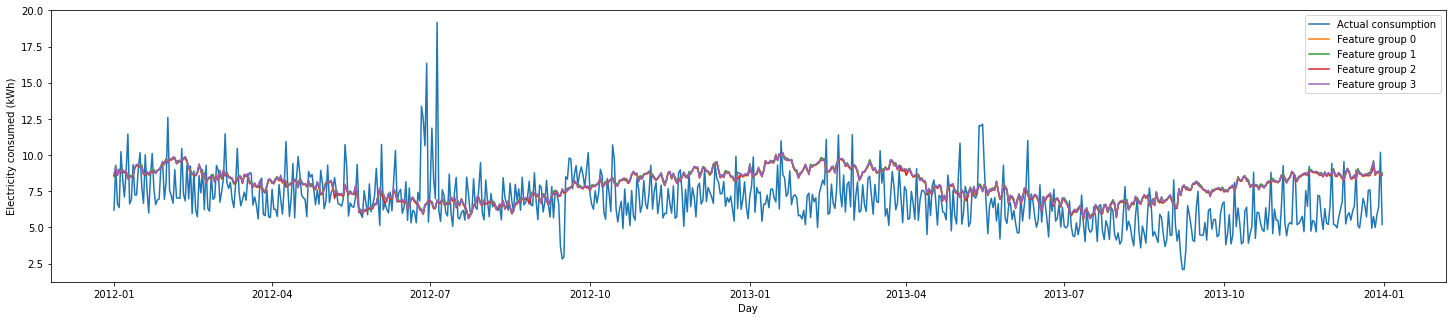

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.708470368561475       0.2875757064871533      4.453236605542626       2.110269320618254       -0.47617968776335395   
1               1.7204198347000341      0.2899684692210437      4.504553122818256       2.12239325357443        -0.49319032680165664   
2               1.6987863229604934      0.2854067857581202      4.406322804265561       2.0991242946203927      -0.4606284816058426    
3               1.7282670815329186      0.29117233326012215     4.5244804327610595      2.127082610704403       -0.4997959246566459    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

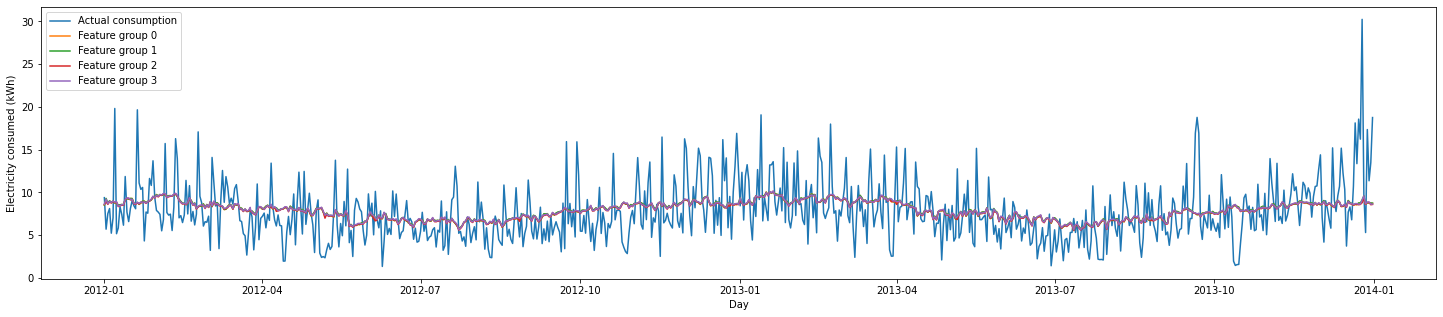

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.449212713781149       0.4203884156852825      10.232760063176151      3.1988685598467703      0.12987877062617725    
1               2.4537345298636395      0.42250432498205326     10.22454479880829       3.197584212934554       0.1305773383525053     
2               2.4147595684072907      0.4146525275274472      10.087361318243104      3.1760606603531842      0.14224244708389377    
3               2.428344591056817       0.41996353226812766     10.104103197903004      3.17869520368075        0.14081883656026561    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

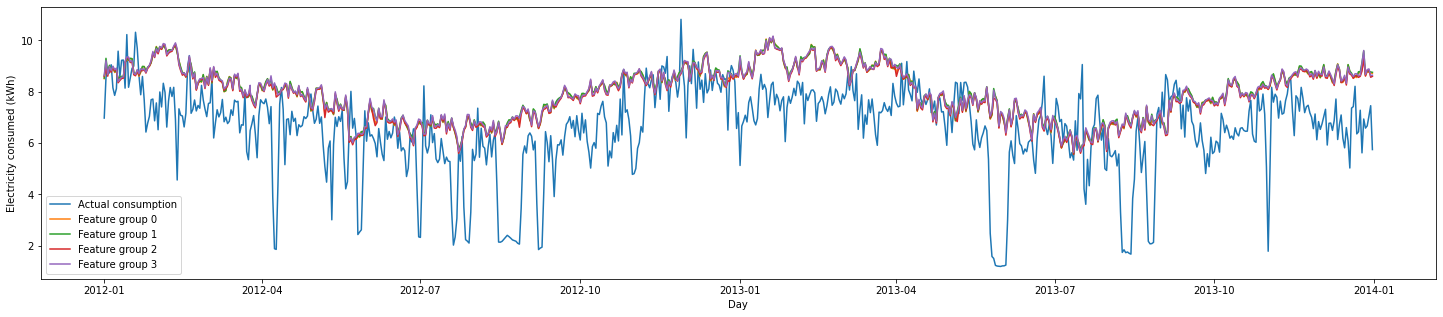

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.5323221127077302      0.37683166916786925     3.8909497062171865      1.9725490377217967      -0.34994622197673486   
1               1.550667897592059       0.3809384945118003      3.9713309038702906      1.9928198372834134      -0.37783409056480455   
2               1.5084849410840249      0.3727484706669944      3.820284456990163       1.9545547976432287      -0.3254292548037492    
3               1.5510870992352654      0.3819013491125949      3.9954707559516156      1.9988673682742473      -0.3862092957400838    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Comfortable households - pearson



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.4868587753741         126902426785684.25      85.79862434106505       9.262754684275356       0.0020610082194325585  
1               5.486872195925836       126921195790110.53      85.76306085689828       9.260834781859478       0.002474653400881044   
2               5.484905247222414       126809043586251.64      85.75597118321669       9.26045199670171        0.0025571146508159837  
3               5.488922494389604       128168201007174.38      85.41367357000516       9.24195182686023        0.0065384387995495175  


<Figure size 432x288 with 0 Axes>

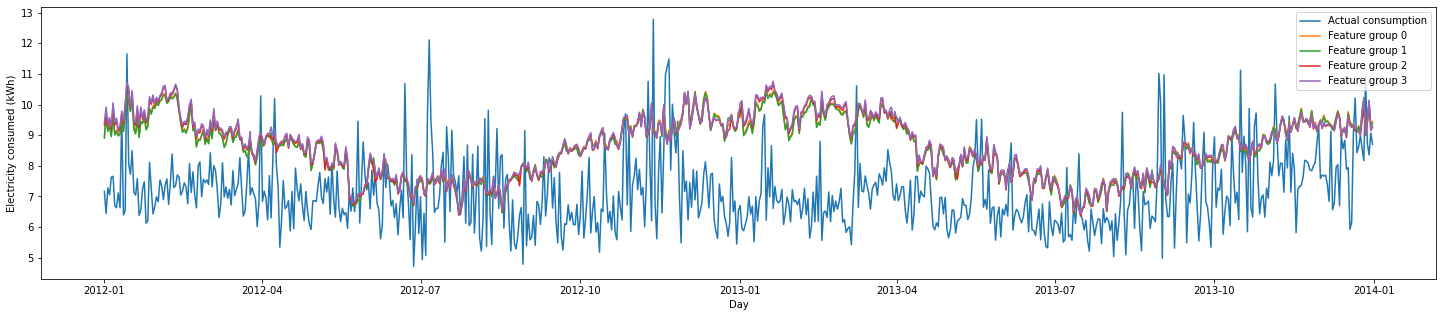

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.758075612456905       0.2618774255774479      4.036765924214953       2.0091704567345583      -1.9637609253934802    
1               1.73620909010911        0.2584460550141471      3.9454446627485154      1.9863143413741229      -1.896713593080174     
2               1.7830643763123886      0.2655263700342823      4.184025223359166       2.0454889937027687      -2.0718775130029843    
3               1.8267946303730689      0.27225479155585736     4.364361851516481       2.089105514691989       -2.204279208316493     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

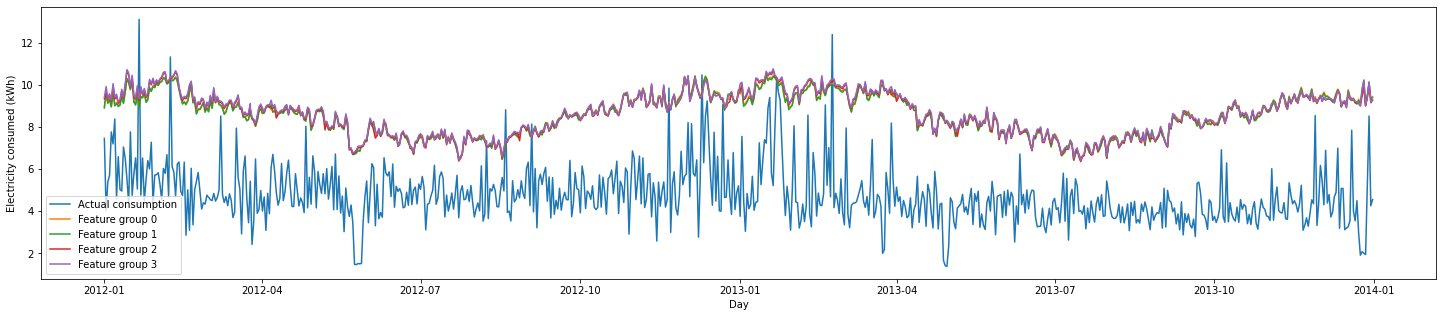

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.863399615603471       0.9462707404465034      16.7475757543694        4.0923802064775705      -7.547870193497367     
1               3.8334692730745266      0.9396314251330405      16.51215929679721       4.063515632650773       -7.427714933401585     
2               3.884272832288782       0.9502292381121163      16.927610264958634      4.114317715607125       -7.639758813643782     
3               3.9392177167909246      0.9630006868477455      17.36179416769251       4.166748632650224       -7.861363880258095     


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

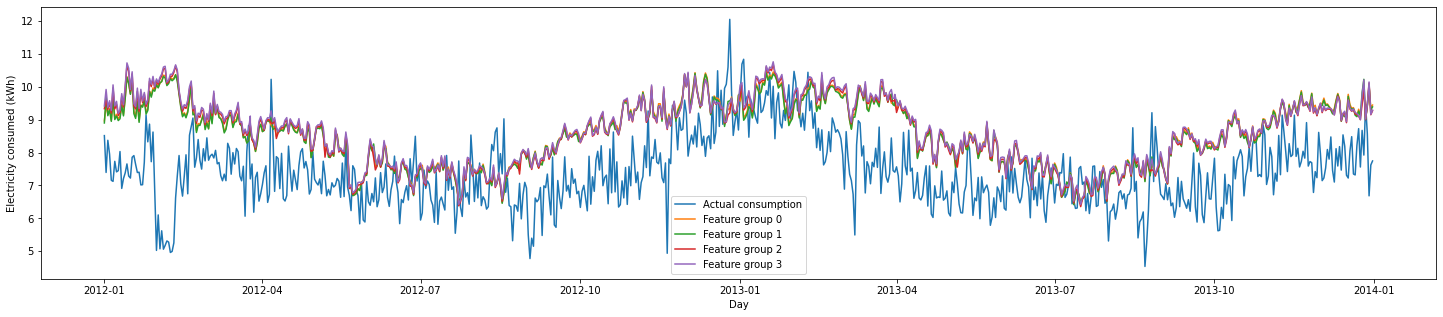

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.3296847490538728      0.19180187358844308     2.4845358070134735      1.5762410370921935      -1.2176642944033942    
1               1.302830149145457       0.18802466562375783     2.401771272449853       1.549764908768376       -1.1437897490551086    
2               1.3462947354987433      0.19406860866400025     2.563937272569481       1.6012299249544024      -1.288537008167388     
3               1.3883626370991955      0.20013412811294287     2.6930423304894435      1.641049155415353       -1.4037745009689684    


In [ ]:
visualise_results(comfortable_households_test[2], household_2_predictions)

get_performance(comfortable_households_test[2], household_2_predictions)

#### Comfortable households - mutual information



-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.511133130108553       128559912356238.2       86.01641106419176       9.274503278569249       -0.0004721077200062762 
1               5.507702134950166       127129099344387.75      86.34222044027153       9.292051465649097       -0.004261654263144399  
2               5.509486188552629       128254447080100.17      86.20394283264984       9.284607844849983       -0.002653322924552448  
3               5.50870112793805        128043611166031.44      86.22167936289607       9.285562953472239       -0.002859619648393208  


<Figure size 432x288 with 0 Axes>

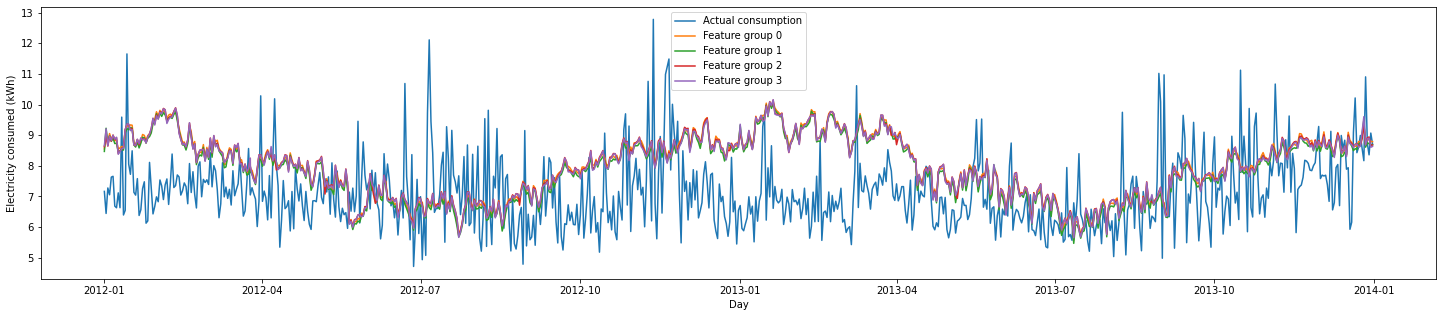

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.362756556733129       0.19905221940467166     2.6633216502396375      1.631968642541773       -0.9553892365631258    
1               1.3182970024807554      0.191719400263539       2.5319315999079417      1.5912044494369484      -0.858923723211793     
2               1.3572570000405237      0.19851335271876727     2.6414569406568753      1.625255961581706       -0.9393363434494213    
3               1.3498048305997694      0.19721345564806397     2.624781897385147       1.6201178652755939      -0.9270936614099359    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

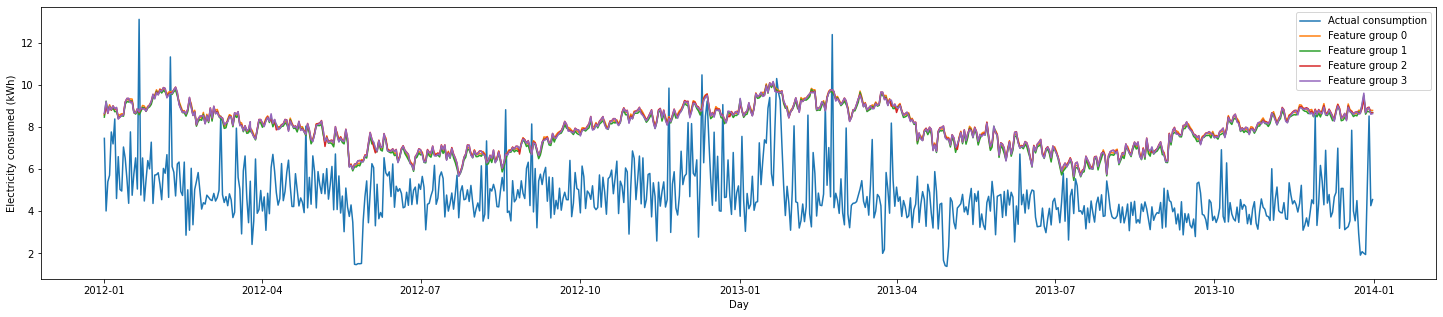

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.2564756249784326      0.8063968359845184      12.44053074805844       3.527113656810401       -5.349578203572084     
1               3.172767285812346       0.7869896487806957      11.896836670067776      3.4491791298898606      -5.0720797481657875    
2               3.2582016778222993      0.8069118379559398      12.420204120872858      3.5242309970932464      -5.339203605289783     
3               3.2402350394321933      0.8027687563523895      12.307850926551588      3.5082546838209434      -5.281859155264982     


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

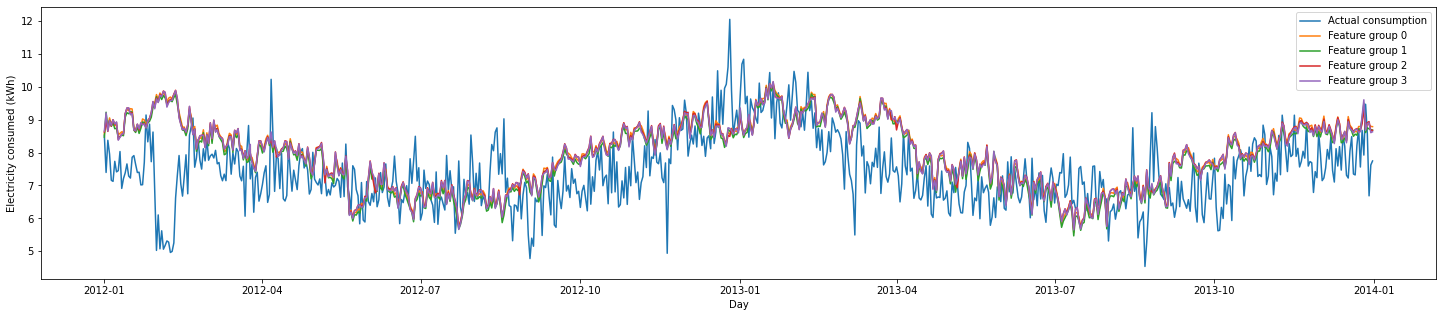

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.9286927970570104      0.13337092374500184     1.4299499598962249      1.1958051513086172      -0.27635470573365994   
1               0.889083360518788       0.12739224264471505     1.33567675049268        1.1557148223037896      -0.19220766715088233   
2               0.9236477338787686      0.1328345818421215      1.4213108984737373      1.1921874426757468      -0.26864359205209154   
3               0.9118006711085221      0.1311046036152434      1.3938556566805904      1.1806166425561646      -0.24413740089678582   


In [ ]:
visualise_results(comfortable_households_test[2], household_2_predictions)
get_performance(comfortable_households_test[2], household_2_predictions)

#### Adversity households - pearson


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.48973217236622        127990099232190.19      85.48765823778078       9.245953614299651       0.00567791002843876    
1               5.4852348409648         126339675802880.94      85.8984382810223        9.268141036962176       0.0009000546100761397  
2               5.488162448799708       128001007323039.28      85.42138128801713       9.242368813676347       0.006448788966572971   
3               5.485546847626793       127274756774363.6       85.58678069877415       9.251312377104892       0.004524999133348917   


<Figure size 432x288 with 0 Axes>

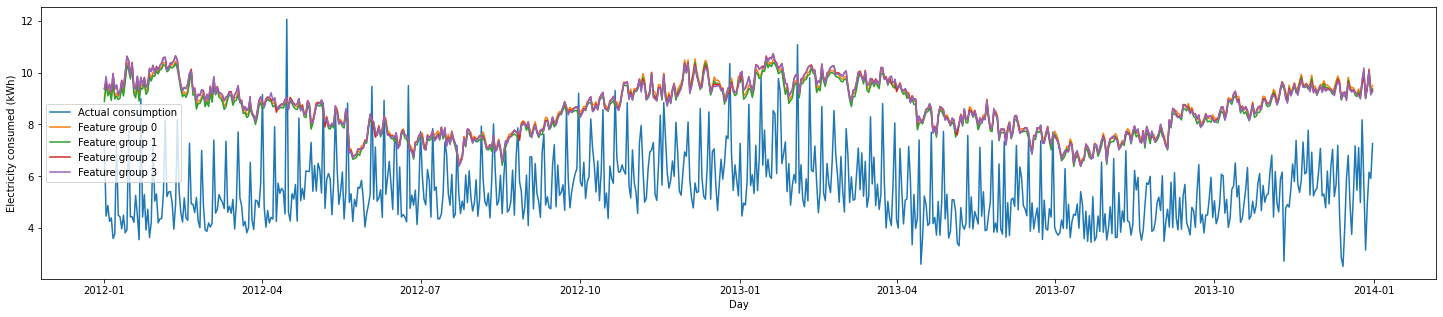

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.2037021564168073      0.6565722048242049      11.995696722645325      3.4634804348581683      -5.696941207386381     
1               3.098194767665847       0.6358598671535037      11.313318018548669      3.3635276152498985      -5.315983755045916     
2               3.2005259622881272      0.6555855868849836      12.00837437889772       3.4653101418051633      -5.704018872030025     
3               3.183137322751591       0.6522495274848447      11.889347515762884      3.4480933159882556      -5.637568717200015     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

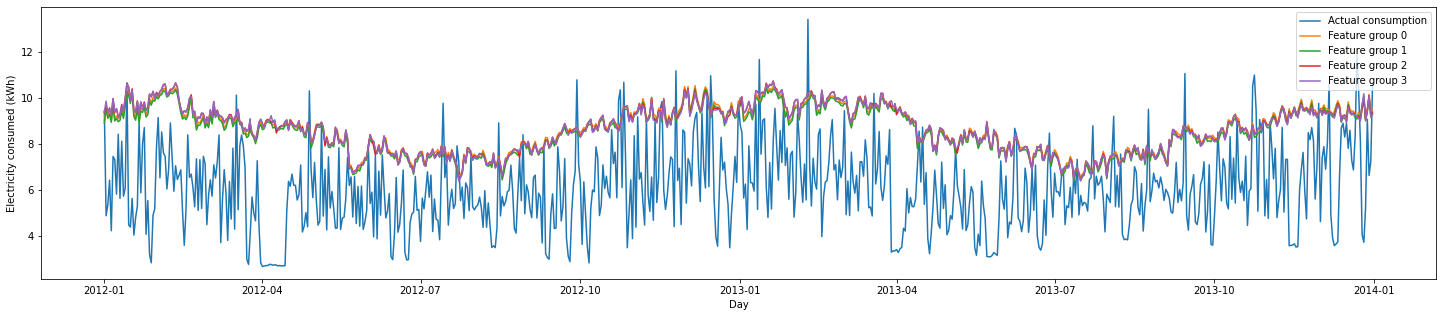

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.772459210636507       0.5844302516681856      10.215484939011576      3.1961672263840604      -2.156421862281566     
1               2.6783365329980793      0.5661973585184918      9.659691162995971       3.108004369848275       -1.9846904529545188    
2               2.7730529952499006      0.5844940676081138      10.26832782749229       3.2044231661084166      -2.1727494717354903    
3               2.759243786642409       0.5821787419139423      10.19667177738081       3.193222788560299       -2.150608895493938     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

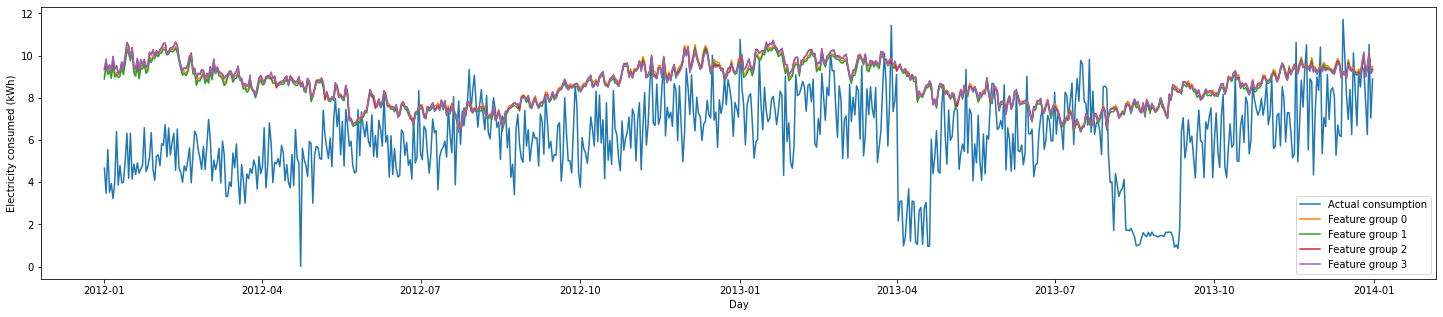

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.7181822863393896      3.6913546570214164      10.551976645628942      3.2483806189590747      -1.7310667123448504    
1               2.625909567928374       3.634137497622176       9.993025928500433       3.16117477031885        -1.5863988696593467    
2               2.722902611675104       3.659773167751342       10.64730002426405       3.263020077208237       -1.7557383463942324    
3               2.7066161149619226      3.639009665257693       10.547066692716427      3.2476247770819255      -1.7297959164163825    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_2_predictions)

get_performance(adversity_households_test[2], household_2_predictions)

#### Adversity households - mutual information 


-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.510257135439994       128255731222242.08      86.0661543428239        9.277184612953647       -0.0010506806016492565 
1               5.512186062821132       128746758185049.69      86.06197730377195       9.27695948593999        -0.0010020967208219655 
2               5.5052771644920515      126707135805211.38      86.43955228670417       9.297287361736442       -0.005393738203220311  
3               5.507997512407476       127793303588213.73      86.22286395459405       9.285626739999516       -0.0028733978441839447 


<Figure size 432x288 with 0 Axes>

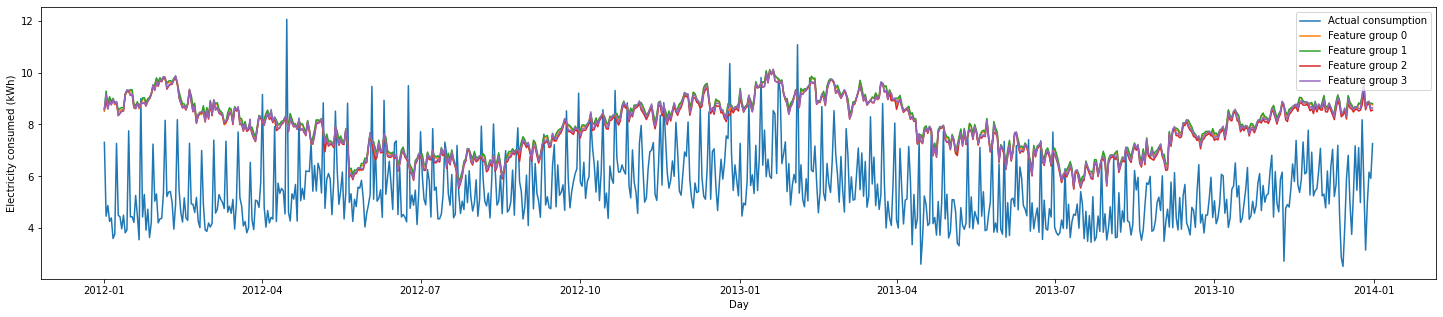

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.5530873535625958      0.5272144772954537      8.110636140924884       2.8479178606351843      -3.5279948840102957    
1               2.6065528744464816      0.538296119997648       8.404285647750102       2.8990145994372125      -3.6919331302210434    
2               2.4633480522968147      0.5091983655928902      7.620943454055427       2.760605631751016       -3.2546099185950785    
3               2.519958449402518       0.5205957041460236      7.91651164716263        2.8136296215320575      -3.4196193263667567    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

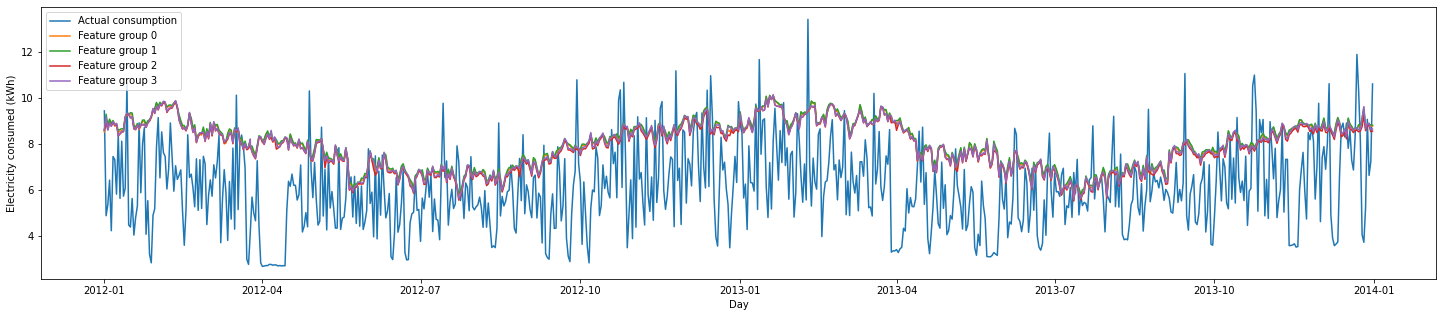

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.2074288054514675      0.4706417491999681      7.019565516665581       2.6494462660460925      -1.1689337503604462    
1               2.252044196543734       0.4800307962891484      7.251477487661806       2.6928567521615046      -1.2405908493378859    
2               2.142227326470655       0.4575701483021672      6.696466318212138       2.5877531408950385      -1.0691012529535464    
3               2.186624916915918       0.46714902378495404     6.9357035447881445      2.633572392167746       -1.1430217390336894    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

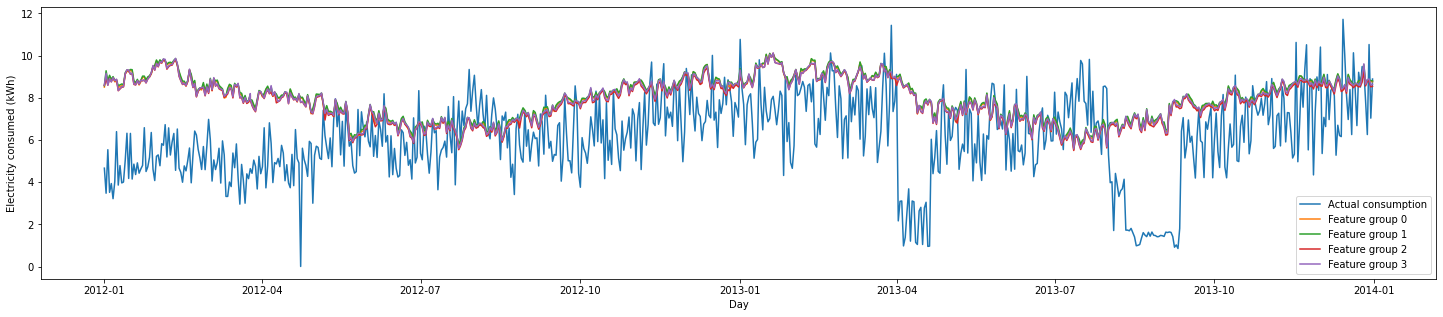

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.2012295880678305      3.335222558262835       7.532543516377779       2.7445479621201336      -0.9495758517803476    
1               2.2368220046056084      3.357040508620174       7.7492304017049625      2.783743954049108       -1.005658835982544     
2               2.140818460421067       3.2522999223327873      7.201610956841125       2.6835817402943265      -0.8639237576055536    
3               2.1753954375284734      3.2669180830366975      7.394973370262704       2.7193700318755267      -0.9139698928889455    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_2_predictions)

get_performance(adversity_households_test[2], household_2_predictions)

## Affluent dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_affluent_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_affluent_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC004552  2012-01-01            6             1      1   
1  MAC004552  2012-01-02            0             2      1   
2  MAC004552  2012-01-03            1             3      1   
3  MAC004552  2012-01-04            2             4      1   
4  MAC004552  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     1.0                        0.0   
1                      0.0                     1.0                        0.0   
2                      0.0                     1.0                        0.0   
3                      0.0                     1.0                        0.0   
4                      0.0                     1.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               6.826454078495283       128002450106187.12      142.06851293666912      11.919249680104413      -0.023614109821742835  
1               6.8267739731573185      128156179071659.11      142.08170935392783      11.919803243087859      -0.0237091909810081    
2               6.822430613738264       127302755777822.62      142.24041858914205      11.92645876147409       -0.024852702721690045  
3               6.829208569694998       130164167491728.98      141.19906990386332      11.882721485579948      -0.017349708670004738  


<Figure size 432x288 with 0 Axes>

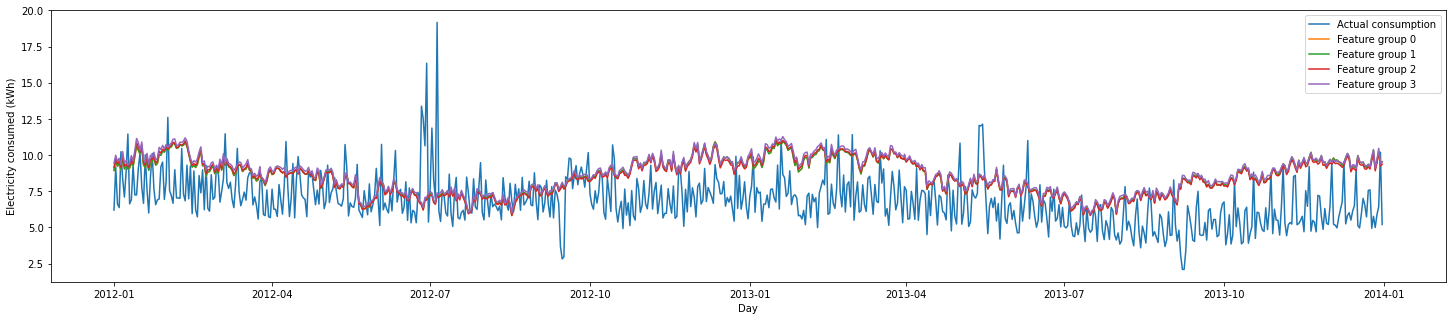

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.1205304790371424      0.3582454169236094      6.43433412125324        2.536598927945299       -1.1328831534023882    
1               2.12562590768381        0.3593698231011356      6.454187625559489       2.5405093240449816      -1.1394642858199493    
2               2.1022922262135113      0.35447139755520285     6.328104092793098       2.5155723191339776      -1.0976695269698271    
3               2.236292223043755       0.37782169182344694     7.030679730185936       2.651542896161768       -1.3305625836167292    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

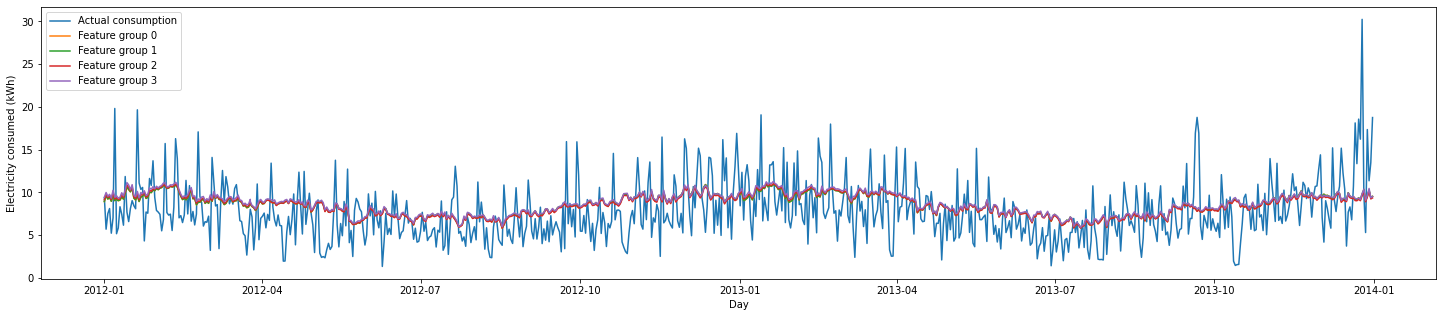

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.6181751493226053      0.4727757415216844      10.817455402519862      3.2889900277318964      0.08016043223674174    
1               2.6219834369803814      0.4740640497874258      10.830175034272306      3.2909231279797933      0.0790788451039165     
2               2.6078521265236736      0.46955117350726117     10.774551199819038      3.2824611497806093      0.08380870087285353    
3               2.6674821917279847      0.4876836033772258      11.0522191408874        3.324487801284192       0.060197791524011834   


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

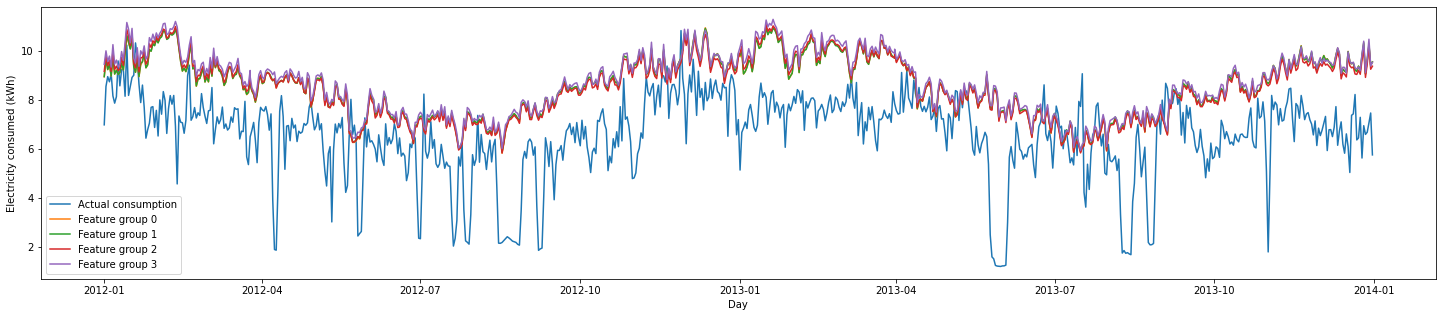

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.0559297868485022      0.46647441549648094     6.00283503692567        2.4500683739287092      -1.0826546450341232    
1               2.0634409485735414      0.4684918078735606      6.040137311365413       2.4576690809312414      -1.0955964891218555    
2               2.0314639823470184      0.46123403988397876     5.889456184564569       2.426820179692877       -1.0433183993991912    
3               2.2004471291428147      0.49184375880163567     6.6771846979332725      2.584024902730868       -1.3166170053581125    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Affluent households - mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               6.824762957541388       128423839884658.02      142.16645813752288      11.923357670451846      -0.024319812214981473  
1               6.823122519428956       127458156203731.77      142.48656930765944      11.93677382325976       -0.026626236796263525  
2               6.824933832404007       128474505620891.95      142.12428757502641      11.921589137989383      -0.024015970203136394  
3               6.8287358309602935      129707859797854.47      141.78041184499745      11.907158008735646      -0.021538320215768625  


<Figure size 432x288 with 0 Axes>

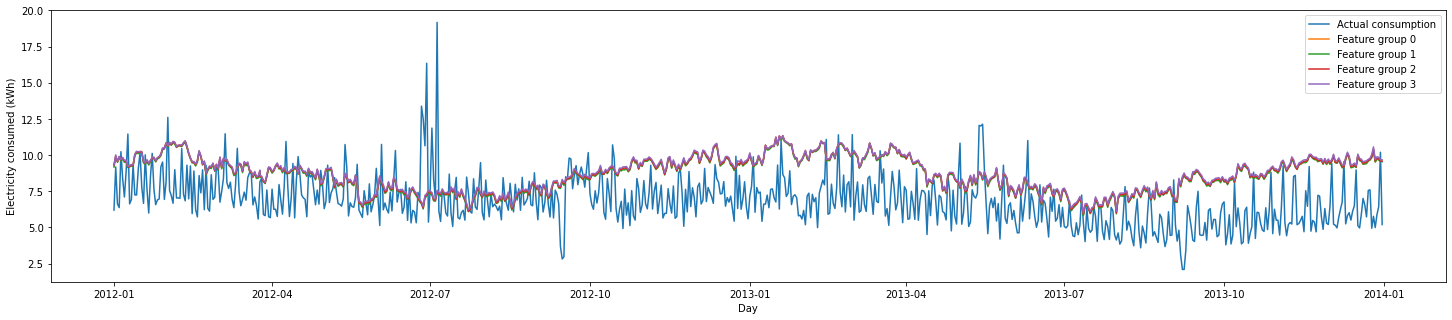

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.216174750666931       0.3756850976631284      6.912725025182741       2.6292061587450197      -1.2914624065937712    
1               2.1718591767083826      0.36785325762177046     6.700557846552381       2.588543576328662       -1.221132238393325     
2               2.221162375609456       0.37648250695052876     6.949983152381488       2.636282069957896       -1.3038129047699605    
3               2.275324132394206       0.38621624928903037     7.228798029881146       2.688642413910996       -1.3962357637527858    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

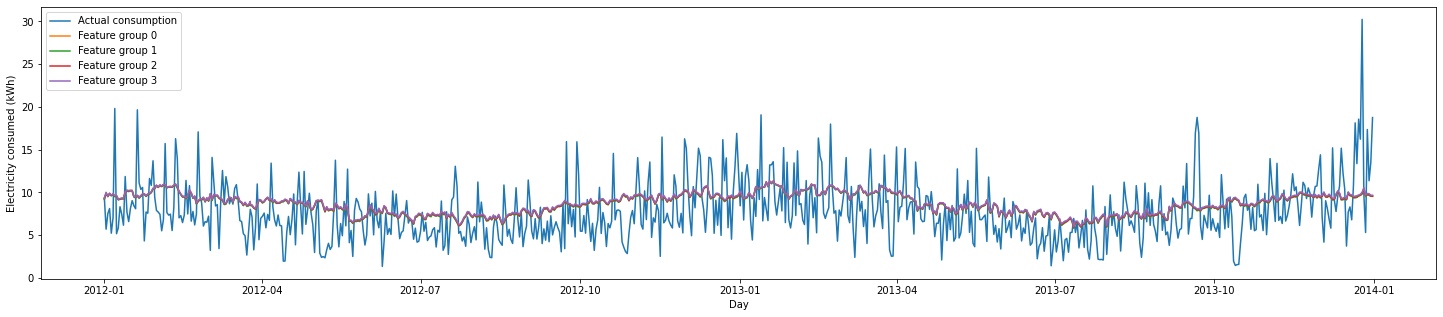

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.688247444335503       0.4901600126227437      11.144255033584486      3.338301219720067       0.05237171296791521    
1               2.6605031759256645      0.4828107649980297      11.002141300691584      3.316947587872257       0.06445605533617482    
2               2.679466679314386       0.4892867474743656      11.095233604148588      3.3309508558591174      0.05654014711306077    
3               2.7087443275784993      0.4975363665472946      11.24485646588858       3.3533351257947035      0.043817281767264515   


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

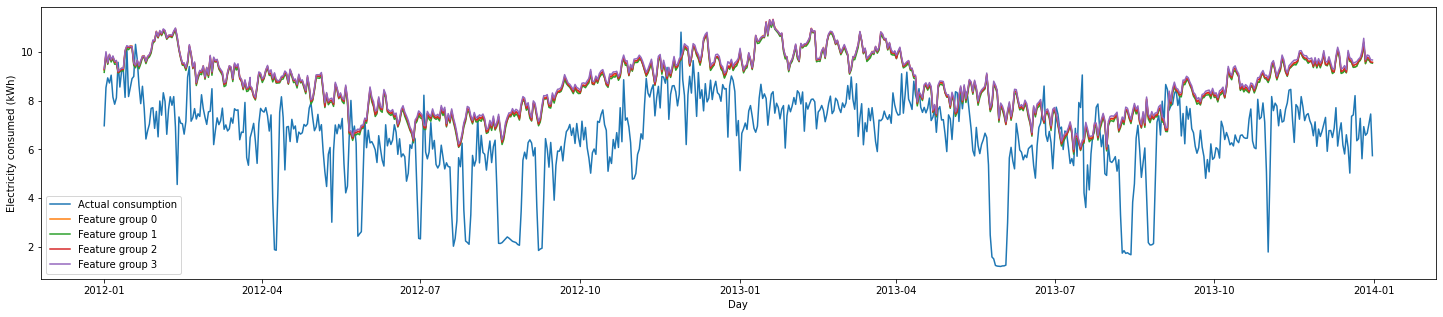

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.1827580404150027      0.49071678462613366     6.595248455394833       2.568121581116212       -1.2881896214520707    
1               2.1259489752159         0.4797905734822124      6.328037444535259       2.515559071962982       -1.1954820508545674    
2               2.1872954069916153      0.49126690406552476     6.618057550312315       2.5725585611045503      -1.2961031268518872    
3               2.2552446904429737      0.5044054882030968      6.9446888388253         2.63527775363913        -1.4094262760056648    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 1, "affluent", "household_1")
save_best_results(household_2_predictions, 1, "affluent", "household_2")
save_best_results(household_3_predictions, 1, "affluent", "household_3")

##Comfortable dataset only

### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_comfortable_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_comfortable_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC000241  2012-01-01            6             1      1   
1  MAC000241  2012-01-02            0             2      1   
2  MAC000241  2012-01-03            1             3      1   
3  MAC000241  2012-01-04            2             4      1   
4  MAC000241  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     0.0                        1.0   
1                      0.0                     0.0                        1.0   
2                      0.0                     0.0                        1.0   
3                      0.0                     0.0                        1.0   
4                      0.0                     0.0                        1.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    419  
1                               0.0                0.0               1    419  
2                               0.0                1.0               0    419  
3                               0.0                1.0               0    419  
4                               0.0                1.0               0    419

### 1.2 Fit and Plot results

#### Comfortable households - Pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.929165038598086       84021881058775.19       59.90844148367514       7.740054359219652       0.010824682910466454   
1               4.928161430685689       83699156027069.66       60.011421840279155      7.746703933950178       0.009124327762260354   
2               4.928665898855345       84187991577694.23       60.033626305775435      7.7481369570868734      0.008757699810437058   
3               4.9269133754715275      83720543464483.97       60.11797814243685       7.753578408866248       0.007364928563009965   


<Figure size 432x288 with 0 Axes>

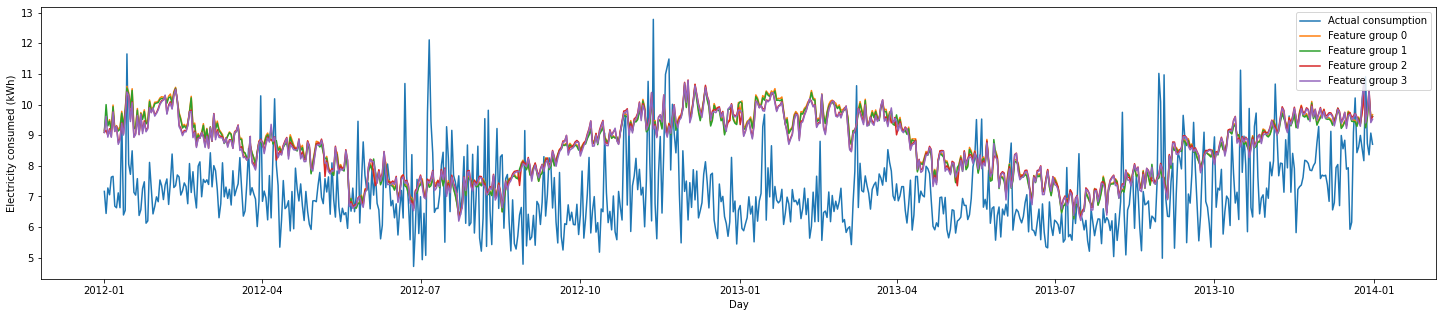

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.809514856513005       0.2692062541080956      4.298938973943483       2.073388283448974       -2.1562462602046057    
1               1.7841725437843585      0.26532497550042783     4.192591503983246       2.047581867467879       -2.078166807023554     
2               1.7840451061712204      0.2658747232039158      4.161971776101681       2.040091119558556       -2.055686050213456     
3               1.7605074108108436      0.262093486980087       4.081714830136745       2.020325426790631       -1.9967620489441607    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

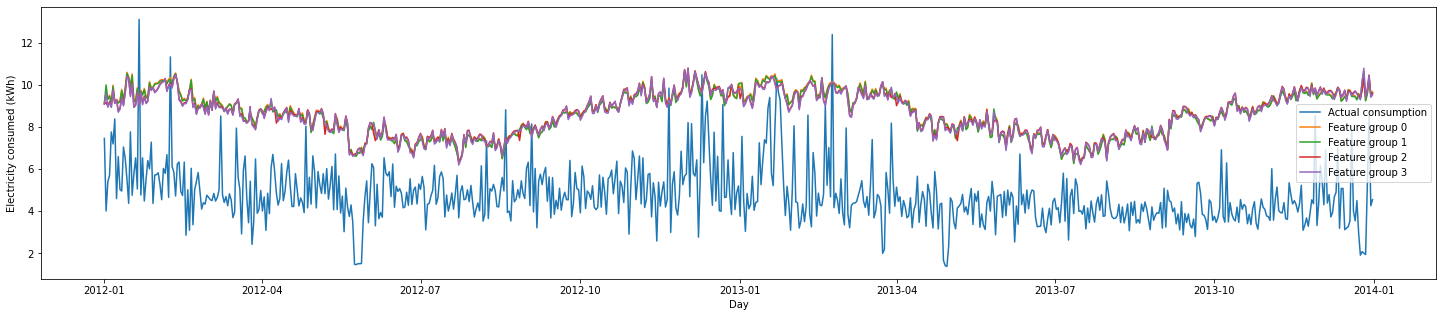

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.9189168339676264      0.9583141414296393      17.304620862766832      4.159882313571723       -7.832182941105728     
1               3.886855428801235       0.9512675603858525      17.050716821453232      4.129251363316749       -7.702591720347295     
2               3.901328835107692       0.9553083609591388      17.134719221919845      4.139410492077325       -7.745466081727237     
3               3.8659022271132715      0.9470762957956634      16.873287186048014      4.107710698923187       -7.612032614112012     


In [ ]:
visualise_results(comfortable_households_test[1], household_2_predictions)
get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

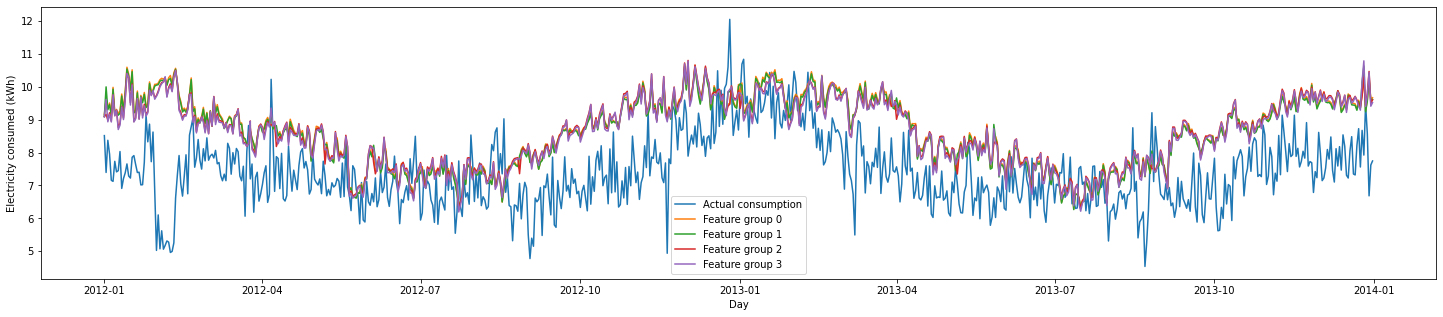

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.3818172052972764      0.19864262600623012     2.6803722063478377      1.6371842310344422      -1.3924653132184104    
1               1.3517626627836037      0.194475910104846       2.580012044029397       1.6062415895591164      -1.30288513976071      
2               1.366648193313244       0.1968676837679624      2.6184848450113356      1.6181733049989842      -1.3372254607182463    
3               1.3360210174601295      0.19253099956553915     2.5272575083566524      1.5897350434448667      -1.255797128471428     


In [ ]:
visualise_results(comfortable_households_test[2], household_3_predictions)
get_performance(comfortable_households_test[2], household_3_predictions)

#### Comfortable households - Mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.930136462761355       83944479280591.0        59.99376387716871       7.745564141956912       0.00941588636112145    
1               4.92797647599053        83122568112097.8        60.206591299774445      7.759290644110094       0.005901796726545561   
2               4.927107029324339       83613565912610.12       60.05999338231936       7.749838281042989       0.008322341108806142   
3               4.9276935444287         84012606713318.0        59.974344077756115      7.744310432682571       0.009736535434374471   


<Figure size 432x288 with 0 Axes>

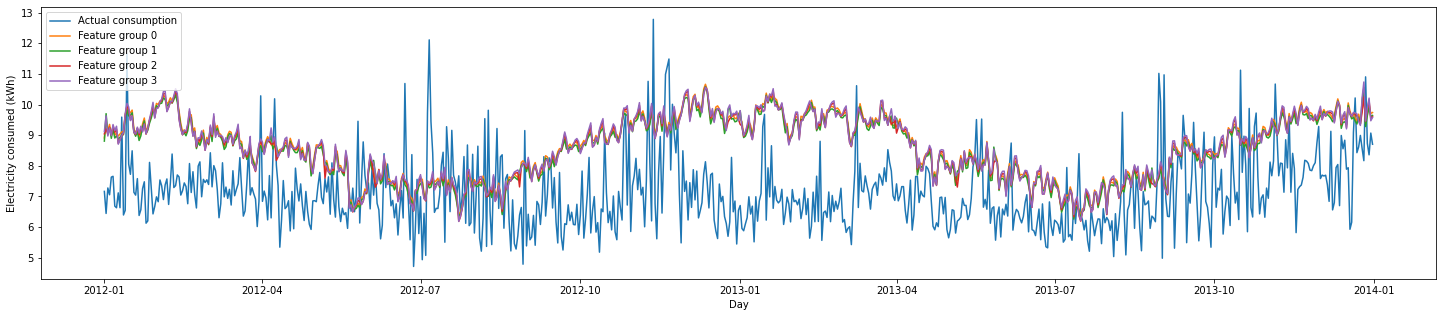

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.7719826320342629      0.2637725729234473      4.09696118988258        2.0240951533667038      -2.0079558030823783    
1               1.7152250986455604      0.25499828516333845     3.8738939371539423      1.968221008208667       -1.8441816284624863    
2               1.748446805692065       0.26018620481280497     4.020823170044904       2.0051990350199413      -1.9520558840957154    
3               1.7782274601566783      0.26475897752276517     4.145126125564173       2.0359582818820656      -2.043318109697904     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

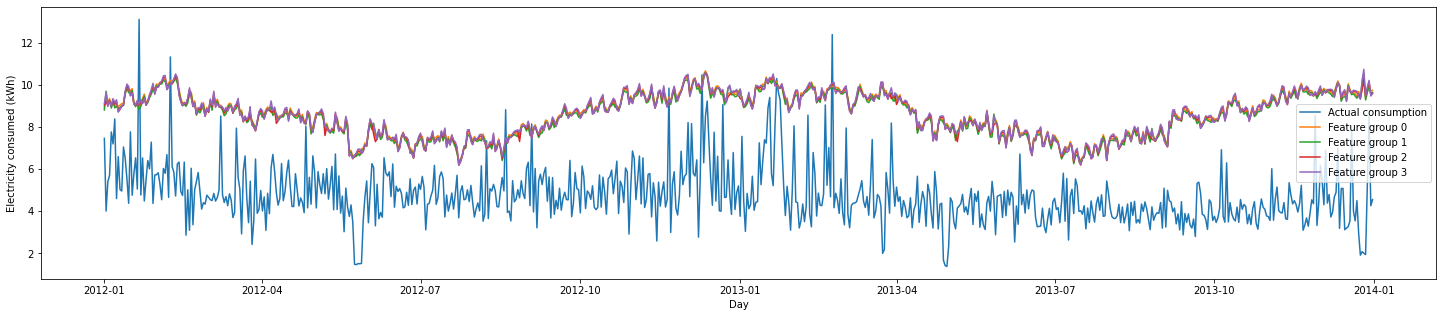

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.880415110144245       0.950744550696083       16.982630928817688      4.120998778065542       -7.66784105668153      
1               3.805828214047888       0.933707774881932       16.401996072131013      4.049937786204994       -7.371488231796842     
2               3.8467175900706554      0.9428377226852107      16.73183450128998       4.090456515022495       -7.539835944840766     
3               3.883766950826001       0.9514780069257776      17.026786466376436      4.126352683227215       -7.690377799247258     


In [ ]:
visualise_results(comfortable_households_test[1], household_2_predictions)
get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

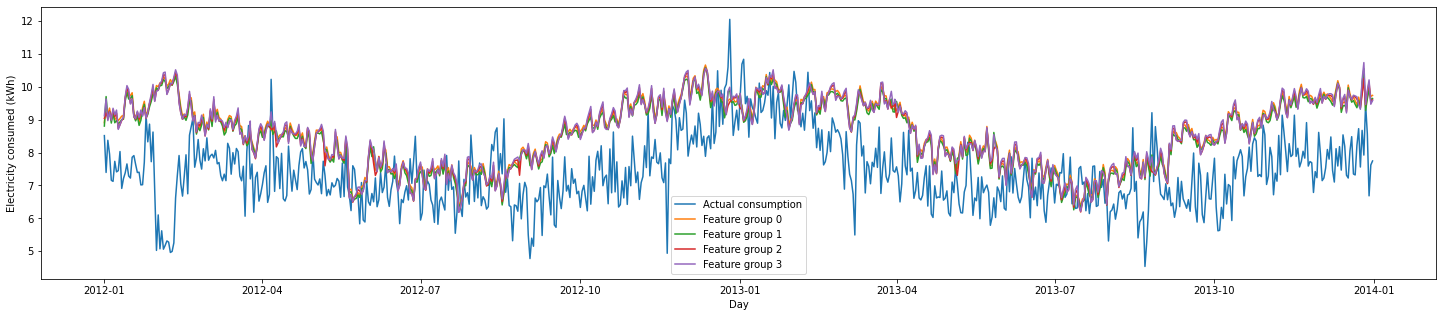

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.3497646653082462      0.19439608583580545     2.5611626587817358      1.600363289625745       -1.2860604240463331    
1               1.288022849305704       0.18564429695404117     2.370771871275675       1.539731103561812       -1.1161200874073267    
2               1.3282345747503188      0.19127409254376954     2.500395908910368       1.5812640225181778      -1.231820814741341     
3               1.3546566185106808      0.1951738356536412      2.5836398296891843      1.6073704705789467      -1.3061232539801746    


In [ ]:
visualise_results(comfortable_households_test[2], household_3_predictions)
get_performance(comfortable_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 2, "comfortable", "household_1")
save_best_results(household_2_predictions, 2, "comfortable", "household_2")
save_best_results(household_3_predictions, 2, "comfortable", "household_3")

##Adversity dataset only

### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_adversity_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_adversity_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC000102  2012-01-01            6             1      1   
1  MAC000102  2012-01-02            0             2      1   
2  MAC000102  2012-01-03            1             3      1   
3  MAC000102  2012-01-04            2             4      1   
4  MAC000102  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      1.0                     0.0                        0.0   
1                      1.0                     0.0                        0.0   
2                      1.0                     0.0                        0.0   
3                      1.0                     0.0                        0.0   
4                      1.0                     0.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Adversity households - Pearson

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.421555023446005       155066947727877.8       42.56641160721894       6.5242939546911085      -0.005780576021026329  
1               4.426997559315053       156739314589281.47      42.38340381298365       6.5102537441319175      -0.001456375841768498  
2               4.433080383623846       158543046161620.03      42.028133812208594      6.482910905774395       0.006938122367752264   
3               4.429865272201193       157818902496573.4       42.09073231714461       6.4877370721342125      0.005459013418340319   


<Figure size 432x288 with 0 Axes>

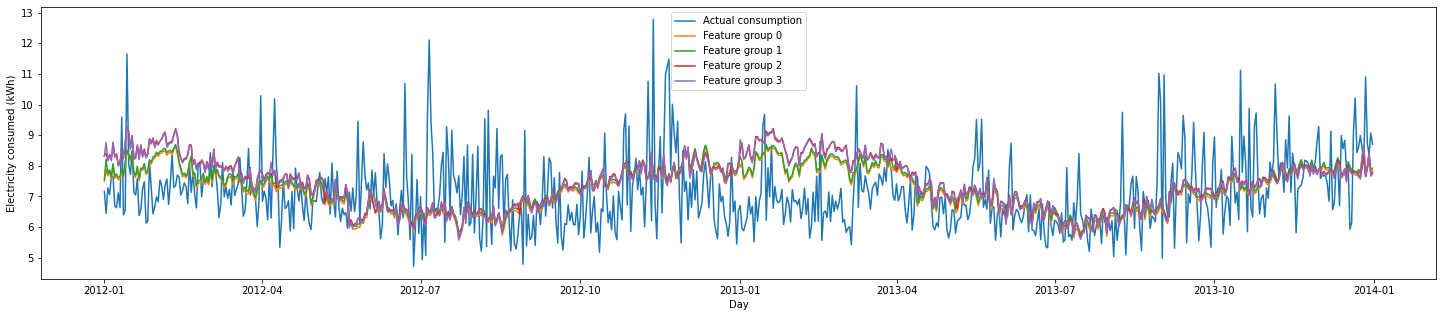

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.9495906739597819      0.13296822189189766     1.5405536193457579      1.2411904041466635      -0.1310620199952255    
1               0.9712565594614365      0.13713910347087943     1.5656367885856912      1.251254086341256       -0.14947788018479136   
2               1.0677395852060607      0.1520251306644784      1.8198071938642268      1.3490022957223708      -0.33608773810030734   
3               1.0592587802833442      0.15041621035337707     1.8101403974796852      1.3454145820079717      -0.3289904543003279    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

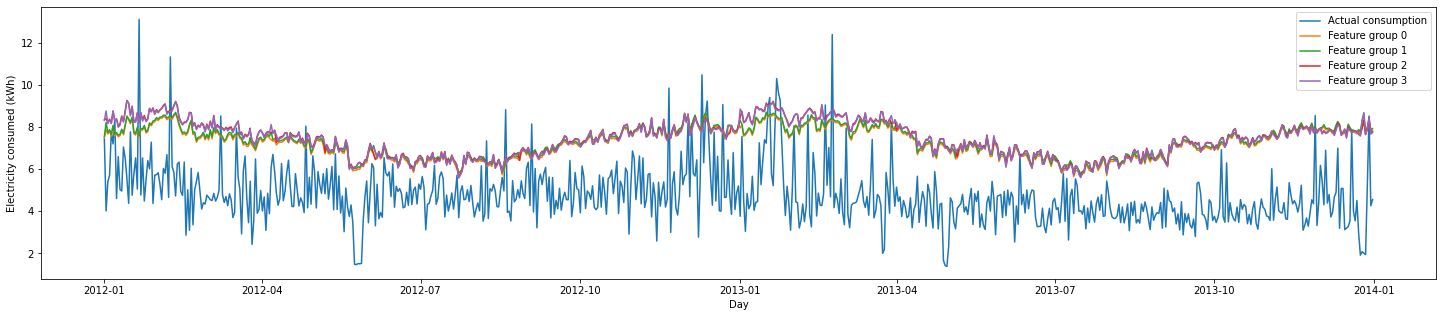

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.5780334304762182      0.6495756379335603      8.013188738411943       2.8307576262216343      -3.0898872873627603    
1               2.6535274205327717      0.6677739641048936      8.423658403434883       2.9023539417918833      -3.2993887379872815    
2               2.769480923335798       0.6933670848754865      9.143650610187287       3.023846988554032       -3.6668687848856276    
3               2.74189283935733        0.6869768477708207      8.993058529681283       2.9988428651200256      -3.5900074184876765    


In [ ]:
visualise_results(comfortable_households_test[1], household_2_predictions)
get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

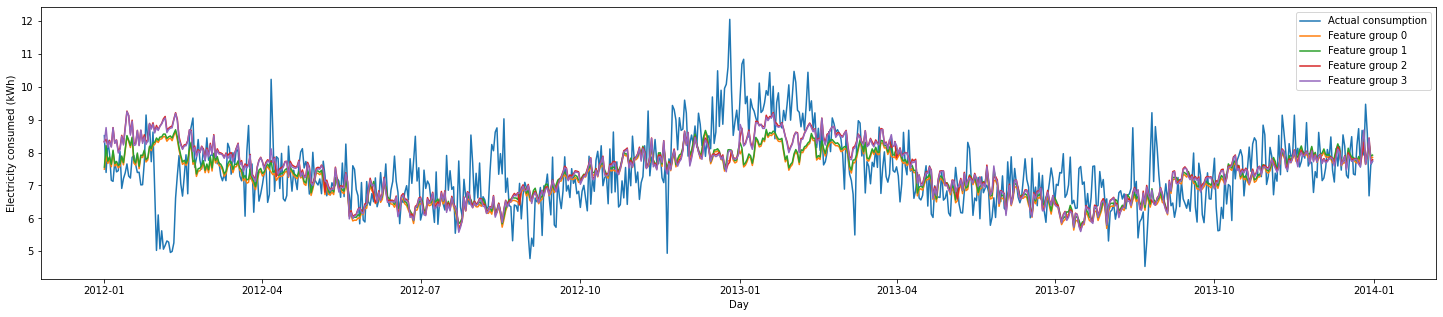

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.7131151358609001      0.09692935684631457     0.9385680443991805      0.968797215313494       0.16224639063099044    
1               0.7030667659125445      0.09643000809075007     0.907065285839152       0.9523997510705009      0.19036534252396553    
2               0.7232440595046299      0.10102921169893643     0.9688306907826738      0.9842919743565289      0.13523434671140555    
3               0.7197518124795372      0.10028488952363103     0.9573078574467416      0.9784211043547362      0.1455194776349864     


In [ ]:
visualise_results(comfortable_households_test[2], household_3_predictions)
get_performance(comfortable_households_test[2], household_3_predictions)

#### Adversity households - Mutual information 

-- Model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.432650408550924       158178306828732.56      42.0628014580542        6.485584126202836       0.006118977800678382   
1               4.438507474453987       159581608271865.47      41.93190375158547       6.475484827531099       0.009211894625023143   
2               4.437828273752207       159911941309685.12      41.900922664001314      6.4730922026494655      0.00994393133987892    
3               4.441406986607315       160741391320152.25      41.83022549769149       6.467629047625682       0.011614399532271724   


<Figure size 432x288 with 0 Axes>

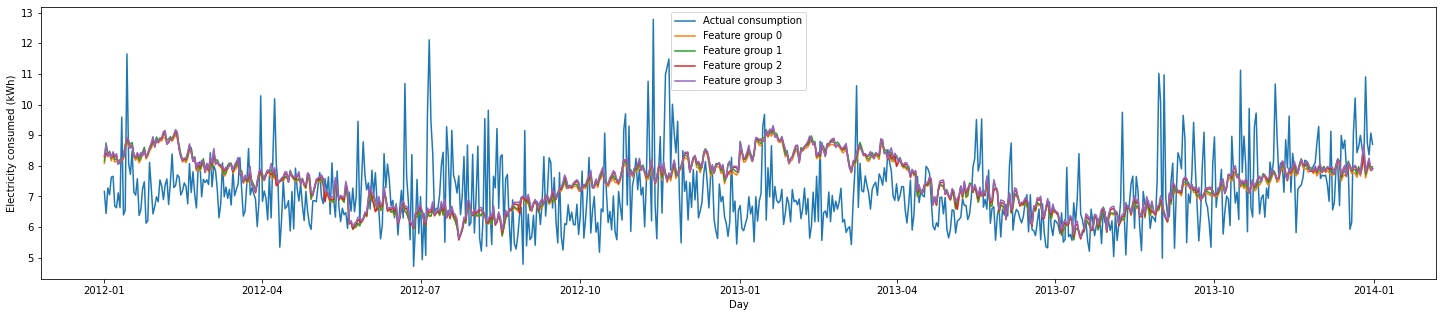

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               1.0476960321951718      0.14805595539126326     1.7675930656441623      1.3295085805079117      -0.29775254703960496   
1               1.075187684662886       0.1527020834076334      1.828685461948429       1.3522889713180497      -0.3426060907933095    
2               1.0742973168150747      0.15302290671016458     1.8284635292814027      1.3522069106765437      -0.342443149622345     
3               1.0880237394539114      0.15564702135629704     1.855932639481151       1.3623261868881296      -0.36261074838673824   


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

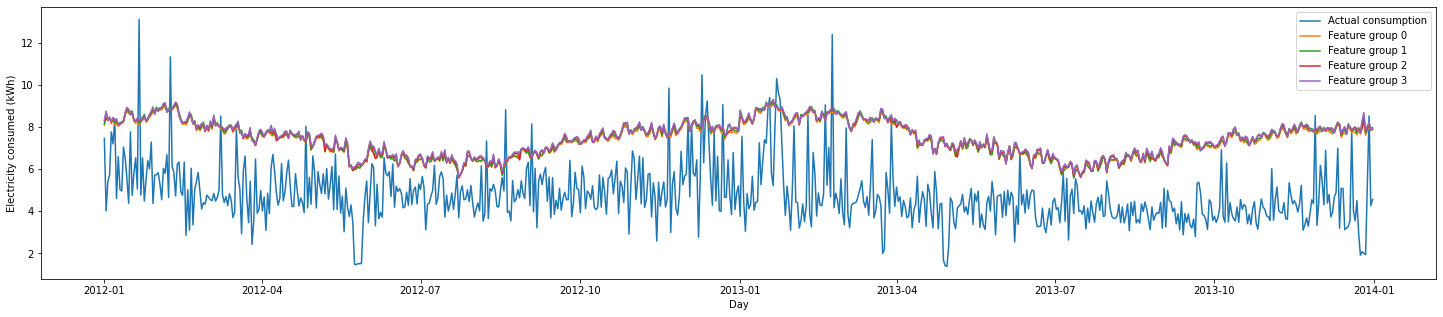

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.7020595081319176      0.678044812503978       8.775530832149682       2.9623522464672702      -3.478982482744043     
1               2.759167956874117       0.6914185941341412      9.12819113843274        3.0212896482185783      -3.6589783558613895    
2               2.7758292294449767      0.6952926690074128      9.204351579367916       3.0338674294319317      -3.6978502243957685    
3               2.8219362084977297      0.7063190395271839      9.458970004588936       3.0755438550911505      -3.8278060627560855    


In [ ]:
visualise_results(comfortable_households_test[1], household_2_predictions)
get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

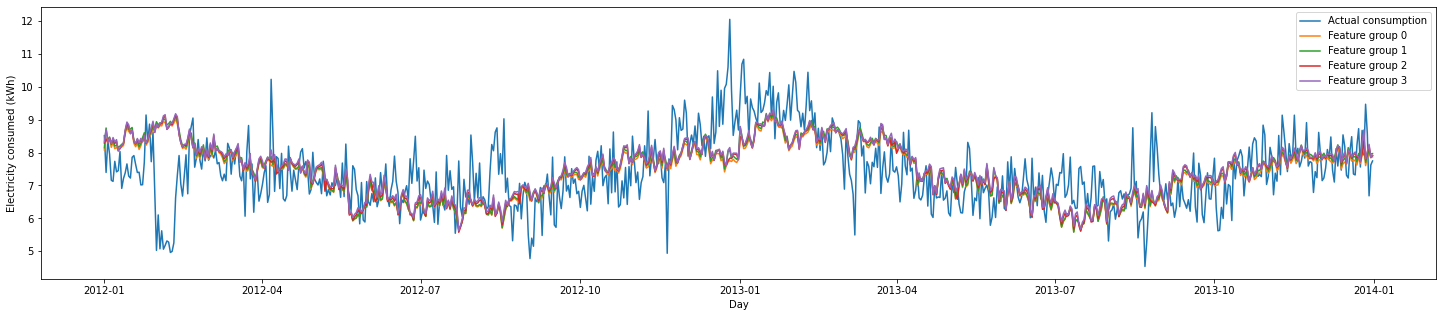

-- Household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               0.7172394361918787      0.09945712750014621     0.959043249142479       0.9793075355282829      0.14397048961493975    
1               0.7207009260497659      0.10067996904511672     0.9623611007414481      0.9810000513463025      0.1410090185005396     
2               0.7235170642299177      0.10122952272546511     0.9666494319473709      0.9831833155354961      0.1371813099317578     
3               0.7246081096595535      0.1018584582394168      0.9608370140793299      0.9802229410084881      0.14236939840032425    


In [ ]:
visualise_results(comfortable_households_test[2], household_3_predictions)
get_performance(comfortable_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

save_best_results(household_1_predictions, 1, "adversity", "household_1")
save_best_results(household_2_predictions, 1, "adversity", "household_2")
save_best_results(household_3_predictions, 1, "adversity", "household_3")